# Atividade desenvolvida no curso de Introdução a Machine Learning com Scikit-learn

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')

In [3]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
mapeados = {
    'unfinished': 'nao_terminado',
    'expected_hours': 'horas_esperadas',
    'price': 'preco'
}

dados.rename(columns=mapeados, inplace=True)

In [5]:
# Cria uma nova coluna com os valores inversos
dados['finalizado'] = dados['nao_terminado'].map({0:1, 1:0})

In [6]:
dados.head()

,nao_terminado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [7]:
dados.tail()

,nao_terminado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


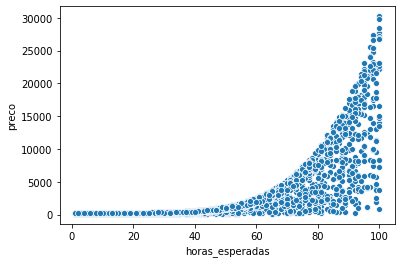

In [8]:
sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

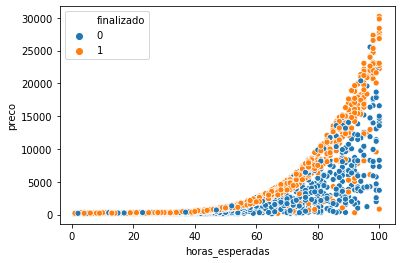

In [9]:
sns.scatterplot(x='horas_esperadas', y='preco', data=dados, hue='finalizado')

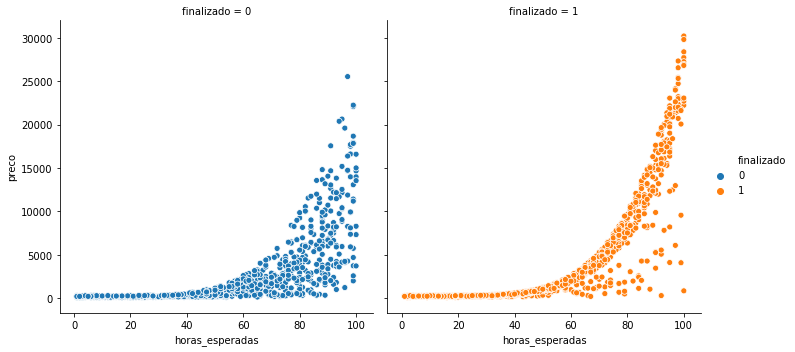

In [10]:
sns.relplot(x='horas_esperadas', y='preco', data=dados, col='finalizado', hue='finalizado')

In [50]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, stratify=y)

print(f'Treinando com {len(X_train)} elementos para treino e {len(X_test)} para teste')

# Modelo
model = LinearSVC()
model.fit(X_train, y_train)
predict = model.predict(X_test)

print('Acurácia de %.2f%%' % (accuracy_score(y_test, predict) * 100))

Treinando com 1617 elementos para treino e 540 para teste
Acurácia de 56.30%


C:\Users\alber\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Criando um valor para referência

In [51]:
baseline = np.ones(540)
acuracia_baseline = accuracy_score(y_test, baseline) * 100
print('Acurácia de baseline %.2f%%' % (acuracia_baseline))

Acurácia de baseline 52.59%


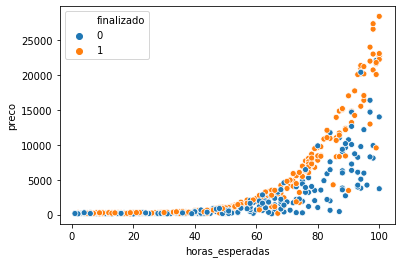

In [52]:
# Analizar as classificações (x_test)
sns.scatterplot(x='horas_esperadas', y='preco', data=X_test, hue=y_test)

### Aparentemente não existe maiores problemas com a divisão de treino e teste, então será necessário tentar entender como o algoritmo está fazendo as previsões criando uma visualização de sua curva de decisão

## Criando uma curva de decisão

In [53]:
x_min = X_test['horas_esperadas'].min()
x_max = X_test['horas_esperadas'].max()
y_min = X_test['preco'].min()
y_max = X_test['preco'].max()
print('X:', x_min,x_max, '\nY:', y_min, y_max)

X: 1 100 
Y: 100 28398


In [54]:
# Criando os eixos
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [55]:
# Criando o Grid com os pontos do grafico
xx,yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [56]:
# usando o modelo para prever o que cada ponto do grafico representa para o modelo
pontos_predict = model.predict(pontos)

In [57]:
# observando o formato dos resultados
print(f'O grid tem o formato de {xx.shape} \nO resultado tem o formato de {pontos_predict.shape} ')

O grid tem o formato de (100, 100) 
O resultado tem o formato de (10000,) 


In [58]:
# Reorganizando o formato dos resultados para oider plotar corretamente
pontos_predict = pontos_predict.reshape(xx.shape)

In [59]:
print(f'Novo formato dos resultados previstos: {pontos_predict.shape} ')

Novo formato dos resultados previstos: (100, 100) 


### Plotando o grafico com a curva de decisão do algoritmo

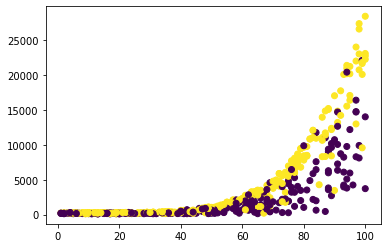

In [60]:
# Reproduzindo o mesmo grafico do seaborn
plt.scatter(X_test['horas_esperadas'], X_test['preco'], c=y_test)

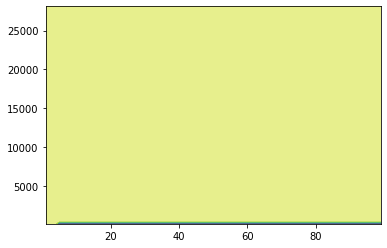

In [61]:
# Curva de decisão do algoritmo

plt.contourf(xx,yy, pontos_predict, alpha=0.5)

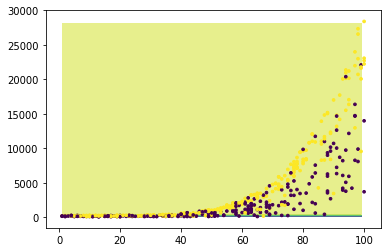

In [62]:
# Dados e curva de decisão do algoritmo
plt.contourf(xx,yy, pontos_predict, alpha=0.5)
plt.scatter(X_test['horas_esperadas'], X_test['preco'], c=y_test, s=7)

### Como podemos ver pela curva, este tipo de algoritmo não generaliza bem com problemas não lineares

# Teste com SVC

In [65]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, stratify=y)

print(f'Treinando com {len(X_train)} elementos para treino e {len(X_test)} para teste')

# Modelo
model = SVC()
model.fit(X_train, y_train)
predict = model.predict(X_test)

print('Acurácia de %.2f%%' % (accuracy_score(y_test, predict) * 100))

Treinando com 1617 elementos para treino e 540 para teste


C:\Users\alber\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Acurácia de 57.59%


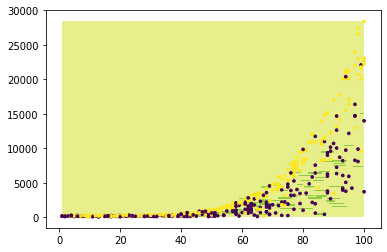

In [67]:
x_min = X_test['horas_esperadas'].min()
x_max = X_test['horas_esperadas'].max()
y_min = X_test['preco'].min()
y_max = X_test['preco'].max()

# Criando os eixos
pixels = 1000
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

# Criando o Grid com os pontos do grafico
xx,yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]


# usando o modelo para prever o que cada ponto do grafico representa para o modelo
pontos_predict = model.predict(pontos)

# Reorganizando o formato dos resultados para oider plotar corretamente
pontos_predict = pontos_predict.reshape(xx.shape)

# Dados e curva de decisão do algoritmo
plt.contourf(xx,yy, pontos_predict, alpha=0.5)
plt.scatter(X_test['horas_esperadas'], X_test['preco'], c=y_test, s=7)

### Esse novo algoritmo conseguiu generalizar em uma faixa diferente do problema, mas ele ainda é muito suscetível a valores com escalas muito diferentes, sendo necessária algum tipo de escalonamento.

## Escalonamento 

In [69]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, stratify=y)

# scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Modelo
model = SVC()
model.fit(X_train, y_train)
predict = model.predict(X_test)

print('Acurácia de %.2f%%' % (accuracy_score(y_test, predict) * 100))

Acurácia de 70.00%


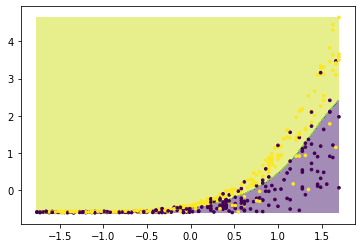

In [71]:
data_x = X_test[:,0]
data_y = X_test[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

# Criando os eixos
pixels = 1000
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

# Criando o Grid com os pontos do grafico
xx,yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]


# usando o modelo para prever o que cada ponto do grafico representa para o modelo
pontos_predict = model.predict(pontos)

# Reorganizando o formato dos resultados para oider plotar corretamente
pontos_predict = pontos_predict.reshape(xx.shape)

# Dados e curva de decisão do algoritmo
plt.contourf(xx,yy, pontos_predict, alpha=0.5)
plt.scatter(data_x, data_y, c=y_test, s=7)

### Com o SVC e os dados em uma mesma escala de valores, a curva de decisão ficou muito mais próxima do formato dos dados de amostra